##### Name - Anish Kumar Barik
##### Redg.No.-24MDT0170
##### Course Name - Data Mining and Machine Learning Lab 
##### Course code - PMDS505P
##### Expt.NO.- 07


In [1]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier


In [2]:
data = pd.read_csv("liver_patient.csv") 
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data = data.drop(columns=['Gender'])

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]


#### Perform Min-Max scaling

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


#### train test split of the data with test size 20 %

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##### Fit the LogisticRegression model fo the training data.

In [10]:
lr = LogisticRegression() 
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy Score is:", accuracy_score(y_test,y_pred))


Logistic Regression Accuracy Score is: 0.7435897435897436


#### Next for the same data fit a Oec/sion Tree with the same training data and check for the testing accuracy


In [12]:
dt = DecisionTreeClassifier(random_state=42) 
dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)
print("Decision Tree accuracy is: ", accuracy_score(y_test, dt_y_pred))


Decision Tree accuracy is:  0.7008547008547008


#### Bagging Classfier and Bagging regressor.

In [14]:
BG = BaggingClassifier(n_estimators=100, random_state=0) 
BG.fit(X_train,y_train)
BG_y_pred = BG.predict(X_test)
print("Bagging Classifier Accuracy is: ",accuracy_score(y_test, BG_y_pred))


Bagging Classifier Accuracy is:  0.7264957264957265


In [15]:
BG=BaggingClassifier(n_estimators=100, random_state=0, bootstrap=False)
BG.fit(X_train,y_train)
BG_y_pred = BG.predict(X_test)
print("Pasting acuuracy is:", accuracy_score(y_test, BG_y_pred))


Pasting acuuracy is: 0.6752136752136753


In [16]:
RFC = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=0) 
RFC.fit(X_train,y_train)
rfc_y_pred = RFC.predict(X_test)
print("Random forest classifier accuracy is: ", accuracy_score(y_test, rfc_y_pred))


Random forest classifier accuracy is:  0.7350427350427351


In [17]:
print(RFC.feature_importances_)

[0.11935501 0.10094567 0.08816933 0.16130052 0.1333759  0.13239645
 0.09378717 0.09781637 0.07285358]


##### Q2. Form a synthetic dataset using the make classification class which we have used in the previous labs with two features and 3 classes. Fit the decisiontreecIassfier,baggingclassifier and randomforestclassifier and print the decision boundaries or the different classifiers. Visualizing in the previous case is not possible so we can see how the nonlinear boundaries are getting created in these models except for a linear boundary that we have seen by other classifiers in the previous labs

In [19]:
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=3,n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42) 
dtc= DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train) 
dtc_pred = dtc.predict(X_test)

print("Accuracy Score of Decision tree classifier is:", accuracy_score(y_test, dtc_pred))

rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy Score of RandomForestClassifier is: ", accuracy_score(y_test,rfc_pred))

bag	= BaggingClassifier(n_estimators=200,random_state=42) 
bag.fit(X_train,y_train)
bag_pred = bag.predict(X_test)
print("Accuracy Score of Bagging Classifier is: ", accuracy_score(y_test,bag_pred))


Accuracy Score of Decision tree classifier is: 0.95
Accuracy Score of RandomForestClassifier is:  0.95
Accuracy Score of Bagging Classifier is:  0.95


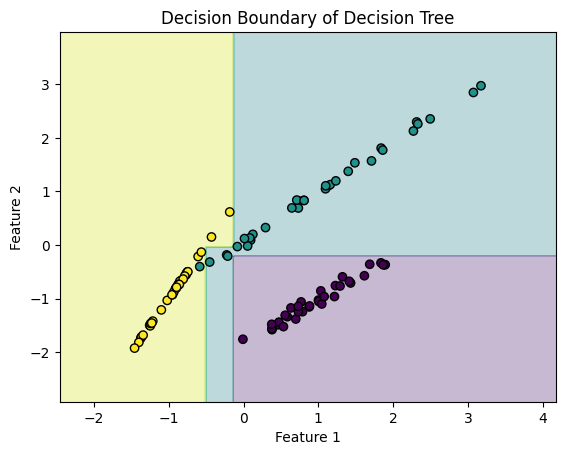

In [20]:
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k') 
plt.title("Decision Boundary of Decision Tree") 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2') 
plt.show()


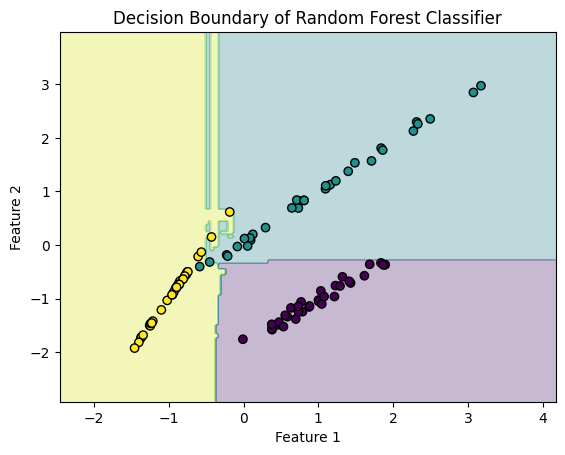

In [21]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title('Decision Boundary of Random Forest Classifier') 
plt.xlabel("Feature 1")
plt.ylabel("Feature 2") 
plt.show()


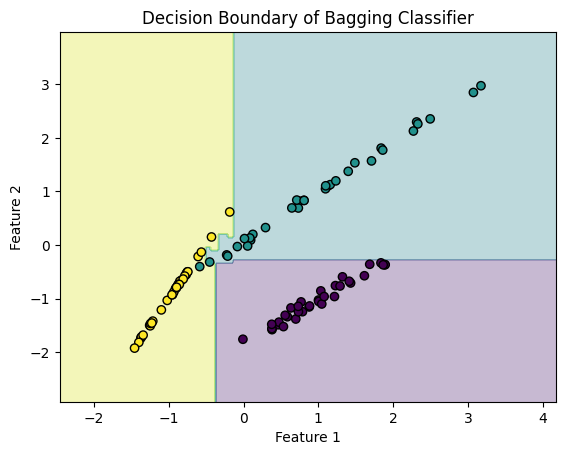

In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

Z = bag.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k') 
plt.title('Decision Boundary of Bagging Classifier') 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2') 
plt.show()


In [23]:
lr_clf = LogisticRegression()
sm_clf=LogisticRegression(multi_class='multinomial') 
rnd_clf = RandomForestClassifier(random_state=0)
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('rf', rnd_clf), ('sm',sm_clf)], voting='hard') 
voting_clf.fit(X_train,y_train)
voting_y_pred = voting_clf.predict(X_test)
print('Voting Classifier Accuracy is: ', accuracy_score(y_test,voting_y_pred))


Voting Classifier Accuracy is:  0.9


In [24]:
lr_clf = LogisticRegression()
sm_clf=LogisticRegression(multi_class='multinomial') 
rnd_clf = RandomForestClassifier(random_state=0)
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('rf', rnd_clf), ('sm',sm_clf)], voting="soft") 
voting_clf.fit(X_train,y_train)
voting_y_pred = voting_clf.predict(X_test)
print('Voting Classifier Accuracy is: ', accuracy_score(y_test,voting_y_pred))


Voting Classifier Accuracy is:  0.95


In [25]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ABC=AdaBoostClassifier(estimator=base_estimator,n_estimators=500, random_state=42) 
ABC.fit(X_train,y_train)
ABC_pred = ABC.predict(X_test)
print('AdaBoost Classifier is: ', accuracy_score(y_test,ABC_pred))


AdaBoost Classifier is:  0.9


##### Next perform hyperparameter tuning using GridSearchCV/'or the random forest classifier with the parameters as max depth, n estimators, min samples leaf with the values given below. you can also try to figure out the maximum accuracy that you can derive using a different parameter grid. Find the best combination of the hyperparameters

In [27]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=0) 
param_grid={
'n_estimators': [10, 50, 100, 200, 300, 400, 500, 700],
'max_depth' : [3,5,7],
'min_samples_leaf': [1, 2, 4]
}

gridsearch=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring="accuracy") 
gridsearch.fit(X_train,y_train)
best_parms = gridsearch.best_params_ 
best_scores = gridsearch.best_score_ 
best_model = gridsearch.best_estimator_ 
y_pred = best_model.predict(X_test)
print("Accuracy Score using GridSearch CV is: ", accuracy_score(y_test,y_pred)) 
print("Best Parameter is: ", best_parms)
print("Best Cross-Validation Accuracy is: ", best_scores)


Accuracy Score using GridSearch CV is:  0.95
Best Parameter is:  {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 50}
Best Cross-Validation Accuracy is:  0.95


##### Again try to tune the parameters in Adaboostclassifier so that we can get maximum accuracy with the following hyperparameters


In [30]:
param_grid={
'n_estimators': [10,50, 75,100, 125, 150, 200, 400, 500],
'estimator__max_depth' : [1, 2, 3]
}
base_estimator = DecisionTreeClassifier()
abc=AdaBoostClassifier(estimator=base_estimator)
gridsearch=GridSearchCV(estimator=abc, param_grid=param_grid, cv=5, scoring="accuracy") 
gridsearch.fit(X_train,y_train)
best_parms = gridsearch.best_params_ 
best_scores = gridsearch.best_score_ 
best_model = gridsearch.best_estimator_ 
y_pred = best_model.predict(X_test)
print("Accuracy Score using GridSearch CV is: ", accuracy_score(y_test,y_pred))
print("Best Parameter is: ", best_parms)
print("Best Cross-Validation Accuracy is: ", best_scores)


Accuracy Score using GridSearch CV is:  0.9
Best Parameter is:  {'estimator__max_depth': 1, 'n_estimators': 10}
Best Cross-Validation Accuracy is:  0.95


##### Now you can try to fit the multiple regression model, DecisionTreeRegressor, BaggingRegressor, RandomForestRegressor and AdaboostRegressor on the Book1.csv file and use the mean squared error to see how these ensemble models perform compared to the basic models.

In [32]:
df = pd.read_csv("Book1.csv") 
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished


In [34]:
df = df.drop(columns=['furnishingstatus'])

In [36]:
y = df.iloc[:, :1]
X = df.iloc[:,1:]


In [38]:
mm = MinMaxScaler()
X = mm.fit_transform(X)
y = mm.fit_transform(y)


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =42)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor 
from sklearn.metrics import mean_squared_error

dtr = DecisionTreeRegressor(random_state=42) 
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)

bgr	=BaggingRegressor(n_estimators=100, random_state=42) 
bgr.fit(X_train,y_train)
bgr_pred = bgr.predict(X_test)

rfr=RandomForestRegressor(n_estimators=100, random_state=42) 
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)

print("Mean Squared Error of DecisionTreeRegressor", mean_squared_error(y_test, dtr_pred)) 
print("Mean Squared Error of BaggingRegressor", mean_squared_error(y_test, bgr_pred)) 
print("Mean Squared Error of RandomForestRegressor", mean_squared_error(y_test, rfr_pred))


Mean Squared Error of DecisionTreeRegressor 0.07872770191343151
Mean Squared Error of BaggingRegressor 0.03622649067900756
Mean Squared Error of RandomForestRegressor 0.03499398677364043
